In [1]:
from keras.models import load_model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.utils import plot_model

In [51]:
# Cargar el modelo
loaded_model = load_model('../models/model-1-10epoch.h5')

In [52]:
loaded_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_16 (Conv2D)             (None, 98, 98, 32)   896         ['input_5[0][0]']                
                                                                                                  
 max_pooling2d_16 (MaxPooling2D  (None, 49, 49, 32)  0           ['conv2d_16[0][0]']              
 )                                                                                                
                                                                                            

In [29]:
df_train = pd.read_csv(r'..\Data\processed\train-processed.csv')
df_val = pd.read_csv(r'..\Data\processed\val-processed.csv')

images_train = np.load(
    '../Data/processed/image_array100_train.npy', allow_pickle=True)
images_val = np.load(
    '../Data/processed/image_array100_val.npy', allow_pickle=True)

In [30]:
X_val = images_val
y_gender_val = df_val['Gender']
y_age_raw_val = df_val['Age']
y_age_val = y_age_raw_val / 80

y_gender_val = np.array(y_gender_val)
y_age_val = np.array(y_age_val)

print('Dimensiones de X:', X_val.shape)
print('Dimensiones de y_gender:', y_gender_val.shape)
print('Dimensiones de y_age:', y_age_val.shape)

Dimensiones de X: (6685, 100, 100, 3)
Dimensiones de y_gender: (6685,)
Dimensiones de y_age: (6685,)


In [55]:
pred = loaded_model.predict(X_val)

y_age_pred = np.round(80*pred[1],2)
y_gender_pred = np.round(pred[0],2)

209/209 [==============================] - 7s 31ms/step


In [53]:
pred = loaded_model.evaluate(X_val, [y_gender_val, y_age_val])

209/209 [==============================] - 7s 30ms/step - loss: 0.5832 - gender_out_loss: 0.4450 - age_out_loss: 0.1382 - gender_out_accuracy: 0.8612 - age_out_accuracy: 0.0034


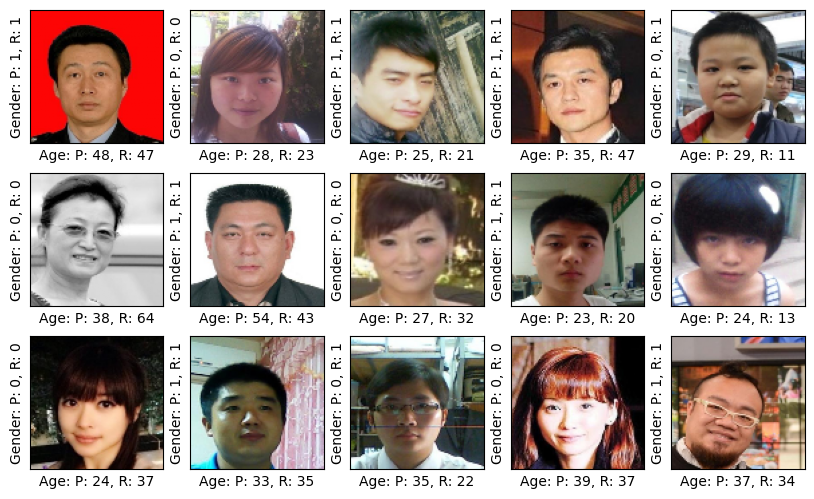

In [56]:
# Verificamos que todo esté correcto:
plt.figure(figsize=(10, 6))

paso = 1000

for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_val[i+paso])
    plt.xlabel(f'Age: P: {int(y_age_pred[i+paso])}, R: {y_age_raw_val[i+paso]}')
    plt.ylabel(f'Gender: P: {int(y_gender_pred[i+paso])}, R: {y_gender_val[i+paso]}')
plt.show()